In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.svm import SVC

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import metrics

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
from sklearn.model_selection import KFold

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.preprocessing import scale

In [11]:
letters = pd.read_csv('Datas/letter-recognition.csv')

In [12]:
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [13]:
print("Dimensions :", letters.shape, "\n")

Dimensions : (20000, 17) 



In [14]:
print(letters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
xbox      20000 non-null int64
ybox      20000 non-null int64
width     20000 non-null int64
height    20000 non-null int64
onpix     20000 non-null int64
xbar      20000 non-null int64
ybar      20000 non-null int64
x2bar     20000 non-null int64
y2bar     20000 non-null int64
xybar     20000 non-null int64
x2ybar    20000 non-null int64
xy2bar    20000 non-null int64
xedge     20000 non-null int64
xedgey    20000 non-null int64
yedge     20000 non-null int64
yedgex    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [15]:
letters.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [16]:
print(letters.columns)

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')


In [17]:
letters.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']


In [18]:
print(letters.columns)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


In [19]:
order = list(np.sort(letters['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


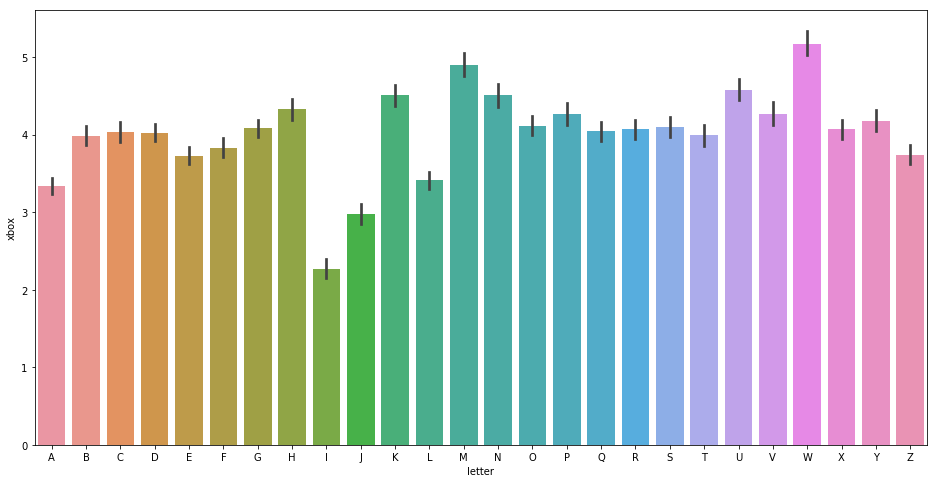

In [20]:
plt.figure(figsize = (16, 8))
sns.barplot(x = 'letter', y = 'xbox', data = letters, order = order )

In [21]:
letter_means = letters.groupby('letter').mean()
letter_means.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


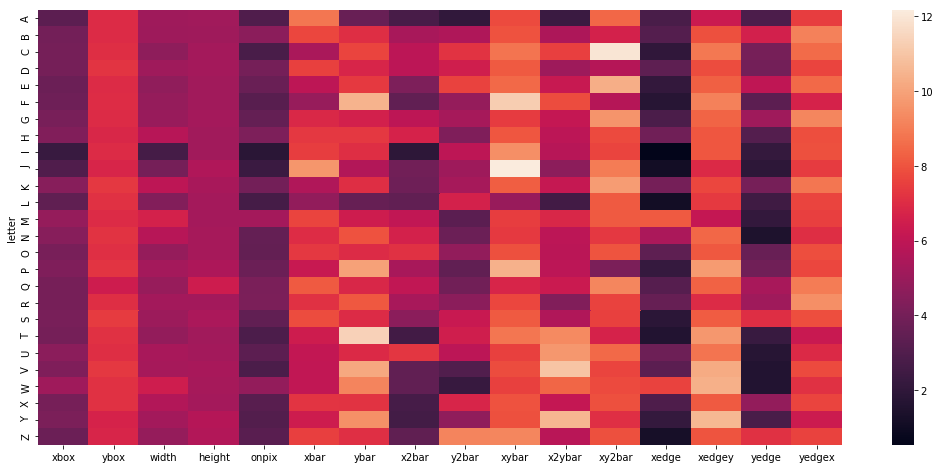

In [22]:
plt.figure(figsize = (18, 8))
sns.heatmap(letter_means)

In [23]:
# Data Preparation

In [24]:
round(letters.drop('letter', axis = 1).mean(), 2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In [25]:
# Splitting into X and y

In [26]:
X = letters.drop('letter', axis = 1)
y = letters['letter']

In [27]:
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [28]:
# Model Building
# Linear model

In [29]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_pred = model_linear.predict(X_test)

In [31]:
# confusion matrix and accuracy


In [32]:
print("accuracy:", metrics.accuracy_score(y_true = y_test, y_pred = y_pred), "\n")

accuracy: 0.849 



In [33]:
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

[[195   0   0   1   0   0   1   0   0   0   1   1   0   0   0   0   1   3
    0   2   1   0   0   0   3   0]
 [  0 187   0   3   0   1   3   3   1   0   1   0   0   2   0   1   1  10
    3   0   0   1   0   1   0   0]
 [  1   0 202   0   7   0   9   1   0   0   6   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0]
 [  2  14   0 209   0   0   1   3   1   1   1   0   0   4   2   0   1   6
    0   2   1   0   0   0   0   0]
 [  0   1   2   0 209   2   8   0   0   0   0   5   0   0   0   0   2   1
    0   2   0   0   0   1   0   1]
 [  0   0   0   2   1 198   1   1   2   2   0   0   0   2   0   2   0   0
    3   6   1   0   0   0   4   0]
 [  0   0  10   4   5   2 161   1   0   0   4   5   2   0   1   0  11   1
    7   0   0   3   2   0   0   0]
 [  1   5   3  11   1   5   3 140   0   0   4   1   2   0  12   0   5  12
    0   1   5   1   1   3   1   0]
 [  0   0   1   3   0   7   1   0 181  10   0   1   0   0   0   0   1   0
    3   0   0   0   0   4   0   3]
 [  2   1   0   2  

In [34]:
# Non Linear Model

In [35]:
# Using rbf kernel, c = 1, default value of gamma

In [36]:
non_linear_model = SVC(kernel = 'rbf')
non_linear_model.fit(X_train, y_train)
y_pred = non_linear_model.predict(X_test)

In [37]:
print("accuracy:", metrics.accuracy_score(y_true = y_test, y_pred = y_pred), "\n")

accuracy: 0.9678333333333333 



In [38]:
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

[[209   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 215   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   1   0   0]
 [  0   0 219   0   3   0   2   1   0   0   0   0   0   0   5   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 244   0   0   0   1   0   1   0   0   0   1   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 222   1   6   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   3]
 [  0   0   0   1   0 220   0   1   1   0   0   0   0   0   0   0   0   0
    0   1   0   1   0   0   0   0]
 [  0   1   1   4   1   0 207   0   0   0   0   0   1   0   1   0   0   0
    0   0   0   1   2   0   0   0]
 [  0   3   0   4   1   0   3 193   0   0   5   0   1   0   1   0   2   4
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 200  14   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  0   0   0   0  

In [51]:
# Grid Search: Hyperparameter Tuning

In [39]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

hyper_params = [{'gamma' : [1e-2, 1e-3, 1e-4],
                'C' : [1, 10, 100, 1000]}]

model = SVC(kernel = 'rbf')

model_cv = GridSearchCV(estimator = model,
                       param_grid = hyper_params,
                       verbose = 1,
                       scoring = 'accuracy',
                       cv = folds,
                       return_train_score = True)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.331482,0.025419,1.030530,0.059294,1,0.01,"{'C': 1, 'gamma': 0.01}",0.927857,0.928571,0.922143,...,0.928429,0.003870,5,0.945089,0.945179,0.945804,0.944821,0.946161,0.945411,0.000494
1,2.353076,0.354299,1.581815,0.134129,1,0.001,"{'C': 1, 'gamma': 0.001}",0.785357,0.798571,0.792500,...,0.794429,0.007234,10,0.804018,0.805357,0.805357,0.801607,0.803661,0.804000,0.001380
2,6.200764,0.476332,2.058050,0.227641,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.606429,0.601786,0.614286,...,0.597714,0.014078,12,0.608036,0.605804,0.619107,0.610446,0.585179,0.605714,0.011215
3,1.594320,0.142839,0.897877,0.022200,10,0.01,"{'C': 10, 'gamma': 0.01}",0.967857,0.965714,0.957857,...,0.965429,0.003934,2,0.989821,0.989375,0.990268,0.990625,0.990089,0.990036,0.000421
4,1.782574,0.051055,1.191512,0.022201,10,0.001,"{'C': 10, 'gamma': 0.001}",0.879643,0.877143,0.861786,...,0.876643,0.008258,8,0.892500,0.890536,0.895089,0.889286,0.893482,0.892179,0.002066
5,3.242096,0.361241,1.765091,0.146295,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.777857,0.783929,0.782857,...,0.783357,0.005064,11,0.793036,0.790714,0.792411,0.788393,0.790714,0.791054,0.001617
6,1.640513,0.079462,0.838740,0.028668,100,0.01,"{'C': 100, 'gamma': 0.01}",0.967500,0.965000,0.960000,...,0.965643,0.003017,1,0.999375,0.999464,0.999464,0.999286,0.999286,0.999375,0.000080
7,1.856001,0.081483,0.804376,0.029721,100,0.001,"{'C': 100, 'gamma': 0.001}",0.928571,0.925000,0.918571,...,0.926429,0.004886,6,0.953036,0.952321,0.953750,0.951339,0.953929,0.952875,0.000956
8,1.878261,0.088608,1.213123,0.038777,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.846071,0.843571,0.831429,...,0.843786,0.008316,9,0.859107,0.853839,0.860625,0.854732,0.858482,0.857357,0.002618
9,1.786203,0.032300,0.879861,0.004479,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.965357,0.962500,0.959286,...,0.963929,0.002701,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


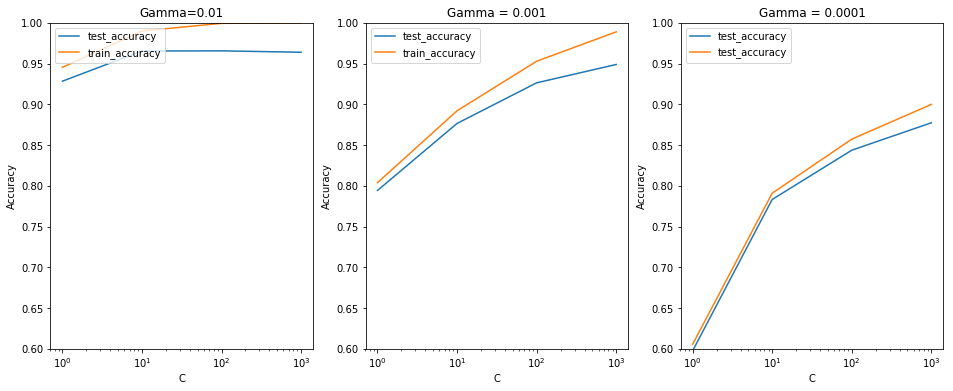

In [50]:
cv_results['param_C'] = cv_results['param_C'].astype('int')
plt.figure(figsize = (16, 6))
plt.subplot(131)

gamma_01 = cv_results[cv_results['param_gamma'] == 0.01]

plt.plot(gamma_01['param_C'], gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'], gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.01')
plt.ylim([0.60, 1])
plt.legend(['test_accuracy', 'train_accuracy'], loc = 'upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma'] == 0.001]

plt.plot(gamma_001['param_C'], gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'], gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.001')
plt.ylim([0.60, 1])
plt.legend(['test_accuracy', 'train_accuracy'], loc = 'upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma'] == 0.0001]

plt.plot(gamma_0001['param_C'], gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'], gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.0001')
plt.ylim([0.60, 1])
plt.legend(['test_accuracy', 'test_accuracy'], loc = 'upper left')
plt.xscale('log')

In [53]:
# Optimal accuracy score and hyper parameters

best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} according to hyperparameter {1}" .format(best_score, best_hyperparams))

The best test score is 0.9656428571428571 according to hyperparameter {'C': 100, 'gamma': 0.01}


In [55]:
model = SVC(C = 1000, gamma = 0.01, kernel = 'rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9685 

[[207   0   0   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 211   0   2   0   0   0   1   0   0   0   0   0   0   0   0   0   2
    0   0   0   2   0   0   0   0]
 [  0   0 224   0   2   0   3   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 239   0   0   1   3   0   0   0   0   0   2   3   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   1   0 224   1   4   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   2]
 [  0   0   0   0   0 218   0   2   1   1   0   0   0   0   0   2   0   0
    0   0   0   1   0   0   0   0]
 [  0   0   3   3   2   0 206   0   0   0   0   0   1   0   2   0   0   0
    0   0   0   1   1   0   0   0]
 [  0   1   2   3   0   1   2 198   0   1   1   1   1   1   1   0   2   2
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 207   7   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 